In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#plotting points and drawing lines
def plot_points(x,y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

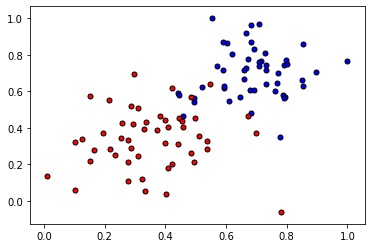

In [16]:
data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

##(Header1,Functions)

used for two  class regression it provided a derivative value between 0 and 1
Sigmoid activation function
𝜎(𝑥)=1/1+𝑒^−𝑥
 
Output (prediction) formula
𝑦̂ =𝜎(𝑤1𝑥1+𝑤2𝑥2+𝑏)
 
Error function
𝐸𝑟𝑟𝑜𝑟(𝑦,𝑦̂ )=−𝑦log(𝑦̂ )−(1−𝑦)log(1−𝑦̂ )
 
The function that updates the weights
𝑤𝑖⟶𝑤𝑖+𝛼(𝑦−𝑦̂ )𝑥𝑖
 
𝑏⟶𝑏+𝛼(𝑦−𝑦̂ )

In [17]:
#sigmoid activation function
def sigmoid(x):
    return 1/(1+np.exp(-x))

#output prediction formula
#uses sigmoid formula to return a single value for the numpy array
def output_formula(features, weights,bias):
    return sigmoid(np.dot(features, weights) + bias)

#error function
#
def error_formula(y,output):
    return -y*np.log(output)-(1-y)*np.log(1-output)

def update_weights(x,y,weights,bias,learnrate):
    output = output_formula(x, weights, bias)
    d_error = y - output
    weights += learnrate * d_error * x
    bias += learnrate * d_error
    return weights, bias

In [12]:
np.random.seed(55)
epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors=[] 
    n_records, n_features = features.shape #returns the dimensions of the array
    last_loss = None
    weights= np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias= 0
    
    for e in range(epochs):
        del_w= np.zeros(weights.shape)
        for x,y in zip(features, targets):
            output = output_formula(x,weights,bias)
            error = error_formula(y,output)
            weights, bias = update_weights(x,y,weights,bias,learnrate)
    
     # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            
    #plotting the solution boundary, which updates each epoch
    plt.title("solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')
    
      # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()
        


========== Epoch 0 ==========
Train loss:  0.63890316649704
Accuracy:  0.52

========== Epoch 10 ==========
Train loss:  0.5620958541965204
Accuracy:  0.73

========== Epoch 20 ==========
Train loss:  0.5071925975057795
Accuracy:  0.81

========== Epoch 30 ==========
Train loss:  0.46378256715944405
Accuracy:  0.87

========== Epoch 40 ==========
Train loss:  0.42885288438055613
Accuracy:  0.92

========== Epoch 50 ==========
Train loss:  0.4002972218192727
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.37660066546545495
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  0.35666522378473664
Accuracy:  0.94

========== Epoch 80 ==========
Train loss:  0.3396856315355183
Accuracy:  0.94

========== Epoch 90 ==========
Train loss:  0.325063010594701
Accuracy:  0.94


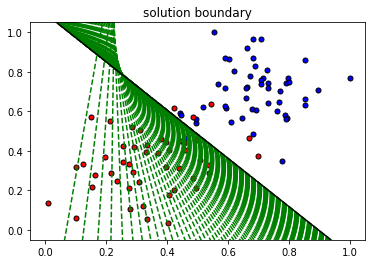

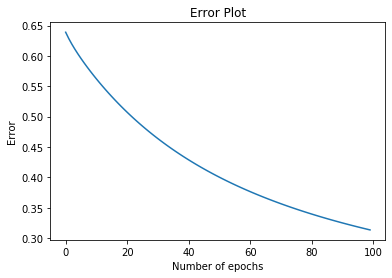

In [18]:
train(X,y,epochs,learnrate,True)